### Import Necessary Libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (18, 22)

### Load Datasets

In [2]:
with open("../data/processed_price_data_with_indicators.pkl", "rb") as f:
    price_data = pickle.load(f)

print("Stocks loaded:", list(price_data.keys()))

Stocks loaded: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


### Visualization

C:\Users\jakin\AppData\Local\Temp\ipykernel_15096\686848600.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df = price_data[ticker].last("24M").copy()
C:\Users\jakin\AppData\Local\Temp\ipykernel_15096\686848600.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = price_data[ticker].last("24M").copy()


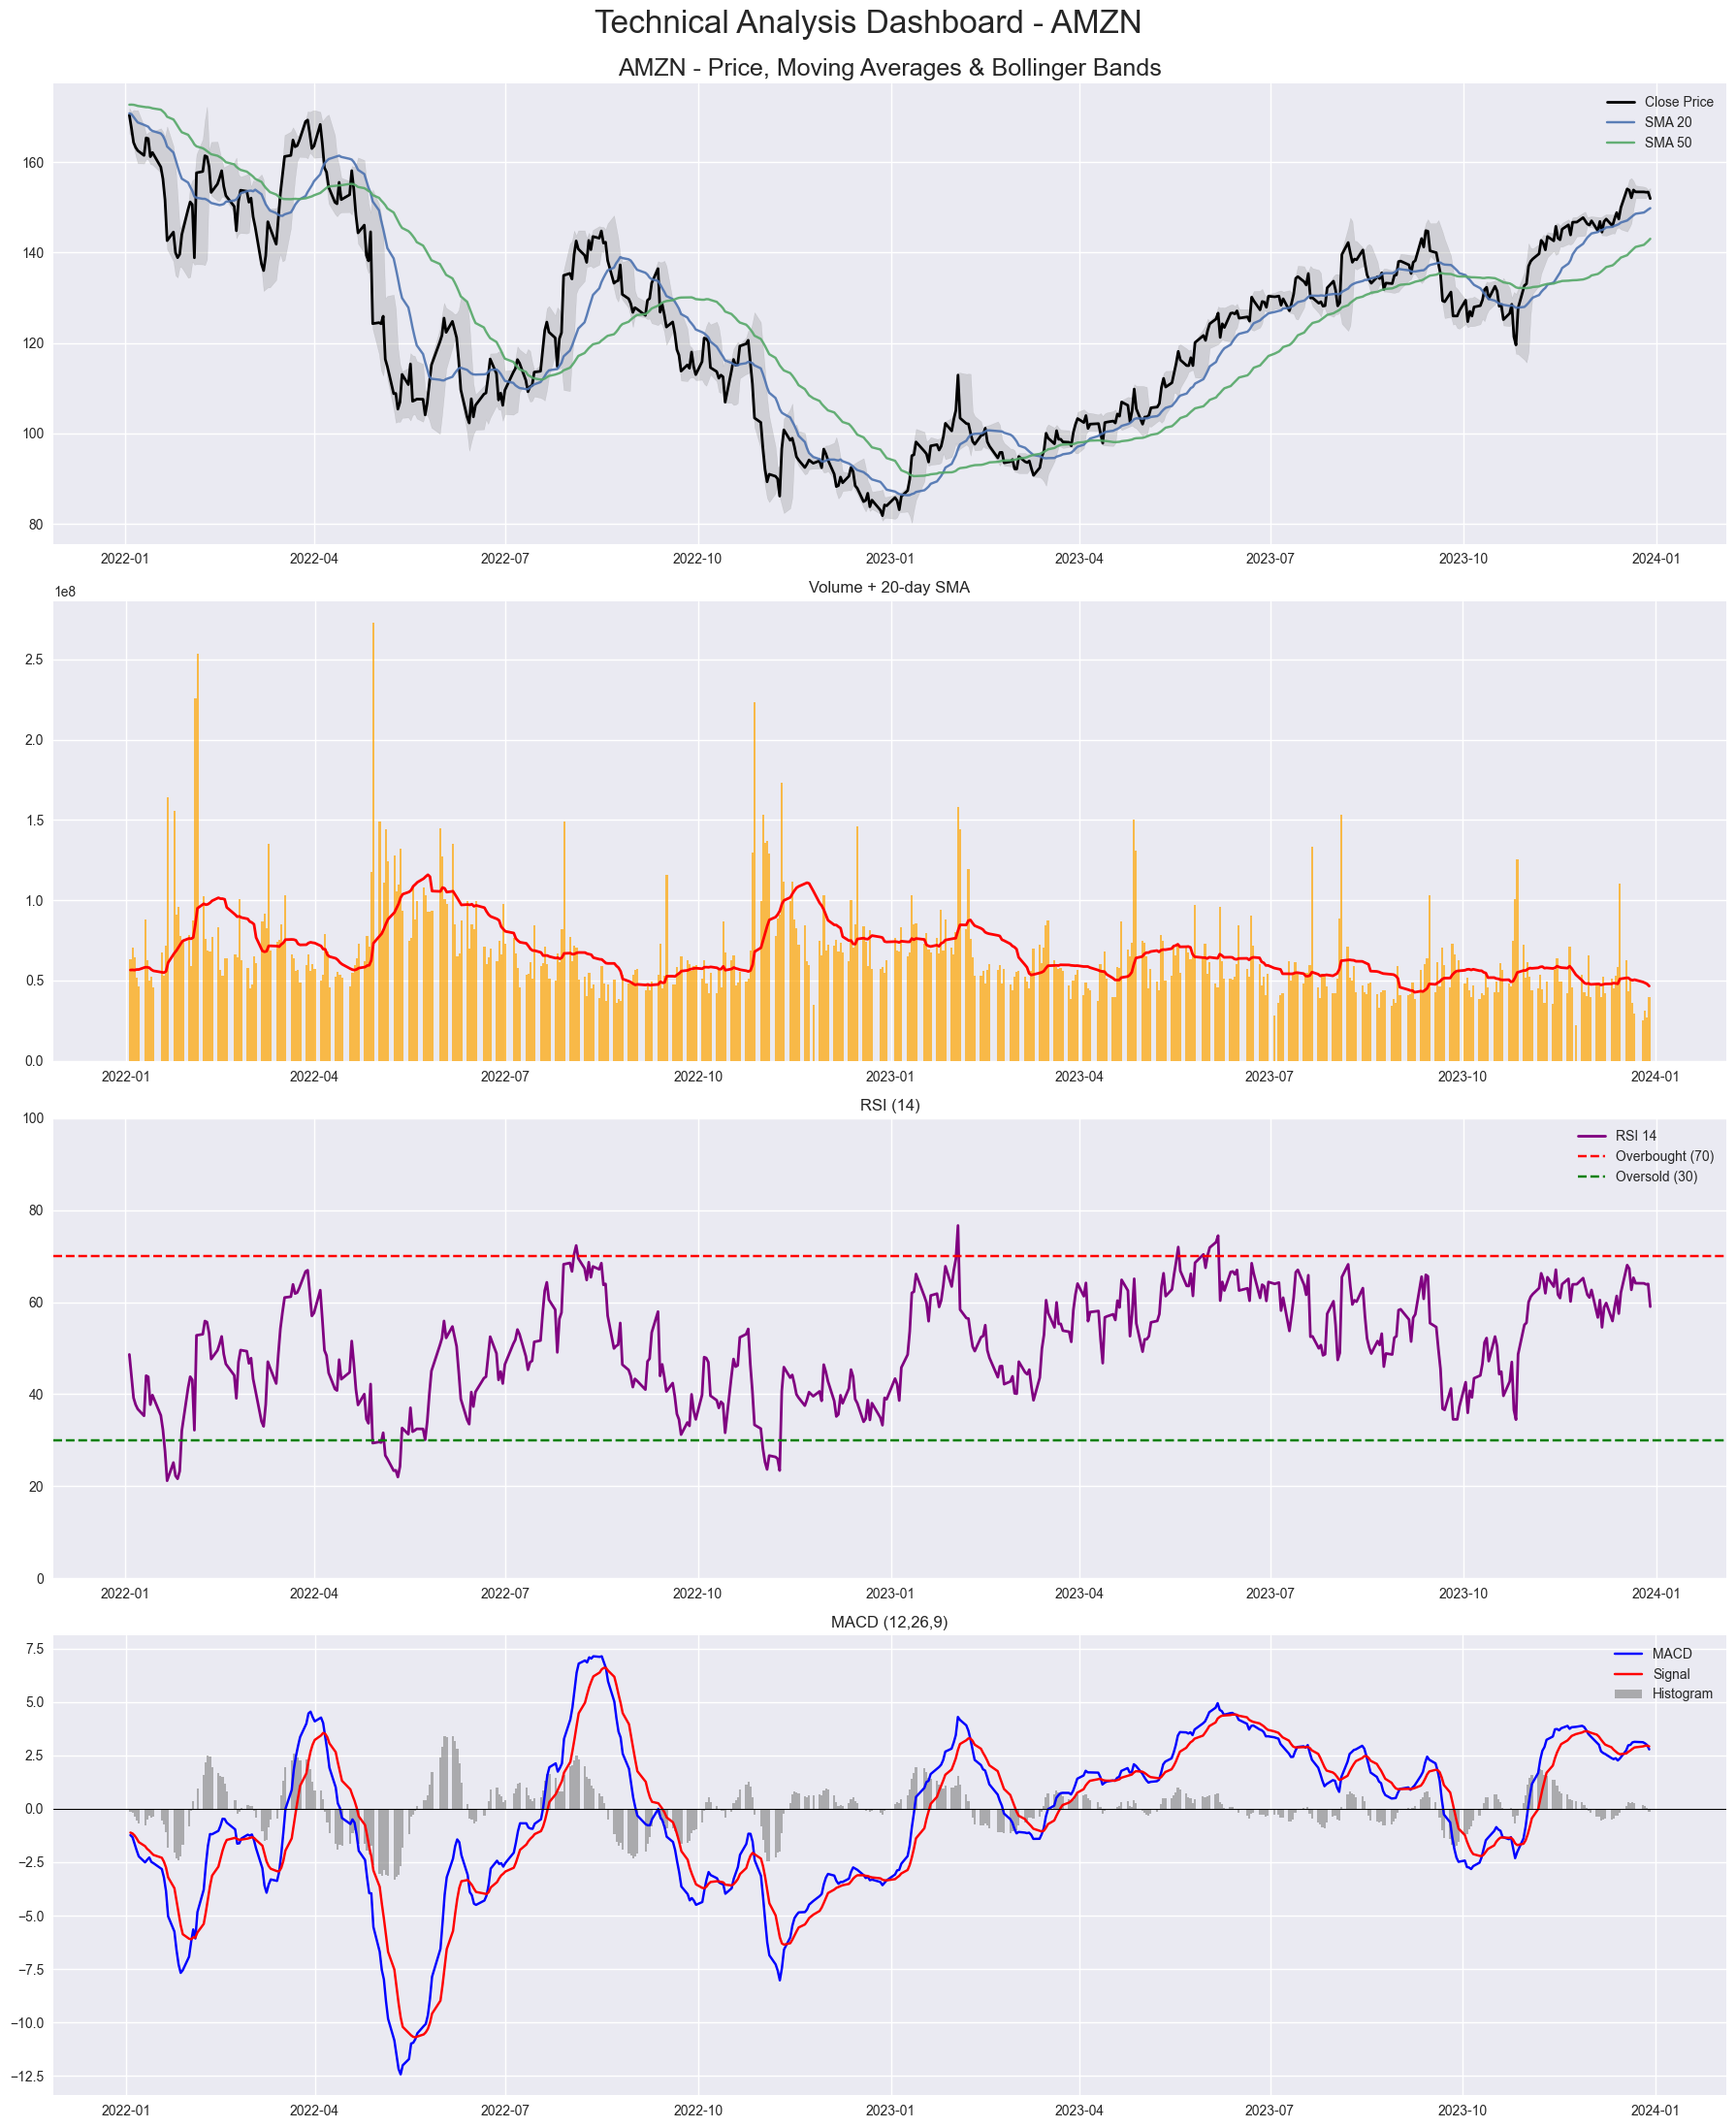

In [3]:
ticker = "AMZN" 
df = price_data[ticker].last("24M").copy()

fig, axes = plt.subplots(4, 1, figsize=(18, 22))

# Price + MAs + Bollinger
axes[0].plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')
axes[0].plot(df.index, df['SMA_20'], label='SMA 20', alpha=0.9)
axes[0].plot(df.index, df['SMA_50'], label='SMA 50', alpha=0.9)
axes[0].fill_between(df.index, df['BB_upper'], df['BB_lower'], alpha=0.25, color='gray')
axes[0].set_title(f"{ticker} - Price, Moving Averages & Bollinger Bands", fontsize=18)
axes[0].legend()

# Volume
axes[1].bar(df.index, df['Volume'], alpha=0.7, color='orange', width=1)
axes[1].plot(df.index, df['Vol_SMA_20'], color='red', linewidth=2)
axes[1].set_title("Volume + 20-day SMA")

# RSI
axes[2].plot(df.index, df['RSI_14'], label="RSI 14", color='purple', linewidth=2)
axes[2].axhline(70, color='r', linestyle='--', label="Overbought (70)") 
axes[2].axhline(30, color='g', linestyle='--', label="Oversold (30)")
axes[2].set_ylim(0, 100); axes[2].set_title("RSI (14)")
axes[2].legend()

# MACD
axes[3].plot(df.index, df['MACD'], label='MACD', color='blue')
axes[3].plot(df.index, df['MACD_signal'], label='Signal', color='red')
axes[3].bar(df.index, df['MACD_hist'], label="Histogram", alpha=0.6, color='gray', width=1)
axes[3].axhline(0, color='black', linewidth=0.8)
axes[3].set_title("MACD (12,26,9)"); axes[3].legend()

plt.suptitle(f"Technical Analysis Dashboard - {ticker}", fontsize=24, y=0.995)
plt.tight_layout()
plt.show()

### Portfolio Optimization

In [9]:
from pynance import portfolio_optimizer as po

TICKERS = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]

portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df"))

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df"))

c:\Users\jakin\Desktop\KIAM program\financial-news-analysis\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\jakin\Desktop\KIAM program\financial-news-analysis\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\jakin\Desktop\KIAM program\financial-news-analysis\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  60.67%
Standard Deviation               34.35%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
AAPL            0.00%
AMZN            0.00%
GOOG           51.49%
META            0.00%
MSFT            0.00%
NVDA           48.51%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.77%
Standard Deviation            19.93%

=== Min Variance Portfolio weights ===
     Portfolio Weight
AAPL           35.82%
AMZN            0.00%
GOOG           14.78%
META            1.18%
MSFT           48.21%
NVDA            0.00%
